Adam Wilczyński 156 065 | Kuba Czech 156 035
group 3

# Report 3 - Basic Graph Algorithms

## Graphs

### Definition

Graph is a data structure used for representing relations between nodes (vertices) using edges (arcs).

### Directed and Undirected Graphs

In directed graphs the edges have the following meaning:

u <-> v
both-way relation

u -> v
u is precedent of v, v is ascendant of u

### Cyclic and Acyclic Graphs

cyclic graph - graph containing a cycle

cycle - closed path
path - walk without repeating vertices
walk - traversing graph vertices using edges

#### Topological Sorting on DAG (Directed Acyclic Graphs)

List of graph vertices such that if u precedes v on the list, there exists a path from u to v on DAG.

Topological sorting is useful for determining order of tasks dependent on each other.

Example practical applications:
- dependency resolution
- task scheduling
- data processing
- compiler design
- network routing

## Program Specifications

### Random Directed Acyclic Graph

Time Complexity: O(n)

### Topological Sort with DFS on Adjacency List

Time Complexity: O(n^2)

### Topological Sort with DFS on Adjacency Matrix

Time Complexity: O(n^2)


In [35]:
import pandas as pd

from dag_report import DAG

## Showcase

In [36]:
test_dag = DAG(6, 5)

print("REPRESENTATION")

print(f"Edge List Representation:\n{test_dag.edge_list_representation}\n")
print(f"Adjacency List Representation:\n{test_dag.adjacency_list_representation}\n")
print(f"Adjacency Matrix Representation:\n{test_dag.adjacency_matrix_representation}\n")

print("TOPOLOGICAL SORTING")

print(f"Adjacency List:\n{test_dag.topological_sort_with_dfs_on_adjacency_list()}\n")
print(f"Adjacency Matrix:\n{test_dag.topological_sort_with_dfs_on_adjacency_matrix()}\n")
print(f"Naive:\n{test_dag.topological_sort_naive_on_edge_list()}\n")

REPRESENTATION
Edge List Representation:
[Edge(v1=0, v2=1), Edge(v1=2, v2=3), Edge(v1=1, v2=5), Edge(v1=0, v2=4), Edge(v1=3, v2=5)]

Adjacency List Representation:
{0: [1, 4], 1: [5], 2: [3], 3: [5], 4: [], 5: []}

Adjacency Matrix Representation:
[[False  True False False  True False]
 [False False False False False  True]
 [False False False  True False False]
 [False False False False False  True]
 [False False False False False False]
 [False False False False False False]]

TOPOLOGICAL SORTING
Adjacency List:
[2, 3, 0, 4, 1, 5]

Adjacency Matrix:
[2, 3, 0, 4, 1, 5]

Naive:
[0, 2, 1, 3, 4, 5]



In [37]:
import timeit

EXPERIMENT_NUMBER = 5

adjacency_list = []
adjacency_matrix = []
naive_list = []

vertex_range = [8, 16, 32, 64, 128, 256]

for vertex_count in vertex_range:
    maximum_edge_count = vertex_count * (vertex_count - 1)
    dag = DAG(vertex_count, maximum_edge_count)

    adjacency_list.append(
        timeit.timeit(
            stmt=lambda: dag.topological_sort_with_dfs_on_adjacency_list(),
            number=EXPERIMENT_NUMBER
        )
    )

    adjacency_matrix.append(
        timeit.timeit(
            stmt=lambda: dag.topological_sort_with_dfs_on_adjacency_matrix(),
            number=EXPERIMENT_NUMBER
        )
    )

    naive_list.append(
        timeit.timeit(
            stmt=lambda: dag.topological_sort_naive_on_edge_list(),
            number=EXPERIMENT_NUMBER
        )
    )

[adjacency_list, adjacency_matrix, naive_list]

[[8.709996473044157e-05,
  0.0002946000313386321,
  0.0009162999922409654,
  0.0035438000923022628,
  0.013454900006763637,
  0.052415400044992566],
 [0.00016469997353851795,
  0.0004339000442996621,
  0.0015190000412985682,
  0.005284499959088862,
  0.020215600030496716,
  0.07695650006644428],
 [0.0002747999969869852,
  0.0015625000232830644,
  0.011186199961230159,
  0.0928393000504002,
  0.9045998000074178,
  7.43713450001087]]

In [38]:
data = {
    "nodes_number": vertex_range,
    # "edge_number": [vertex_count * (vertex_count - 1) for vertex_count in vertex_range],
    "adjacency_list": adjacency_list,
    "adjacency_matrix": adjacency_matrix,
    "naive_list": naive_list,
}
df = pd.DataFrame(data).melt("nodes_number", var_name="method", value_name="seconds")
df

,nodes_number,method,seconds
0,8,adjacency_list,0.000087
1,16,adjacency_list,0.000295
2,32,adjacency_list,0.000916
3,64,adjacency_list,0.003544
4,128,adjacency_list,0.013455
5,256,adjacency_list,0.052415
6,8,adjacency_matrix,0.000165
7,16,adjacency_matrix,0.000434
8,32,adjacency_matrix,0.001519
9,64,adjacency_matrix,0.005284


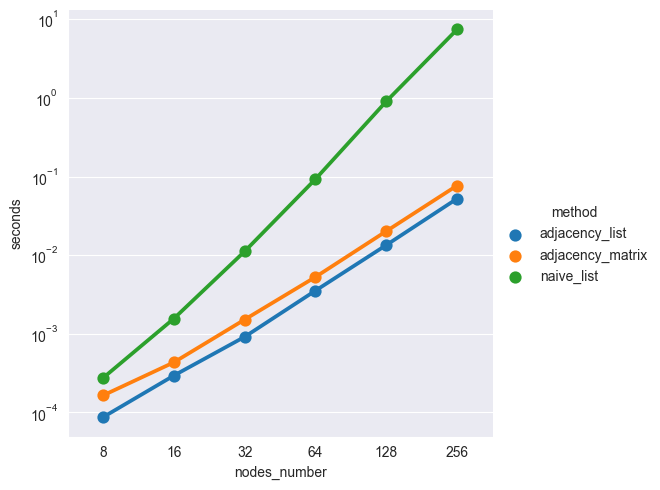

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(df, x="nodes_number", y="seconds", hue="method", kind="point")
plt.yscale("log")